In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../Data/TTF_daily_prediction.csv')

In [23]:
# Ensure 'Date' is datetime and sort
df = df.sort_values('Date').reset_index(drop=True)

hourly_rows = []
for idx, row in df.iterrows():
    # Get prices for interpolation
    open_price = row['Open'] if not pd.isnull(row['Open']) else row['Price']
    high_price = row['High'] if not pd.isnull(row['High']) else row['Price']
    low_price = row['Low'] if not pd.isnull(row['Low']) else row['Price']
    close_price = row['Price']

    # Interpolate prices for 24 hours
    for hour in range(24):
        hourly_row = row.copy()
        hourly_row['Date'] = row['Date'] + pd.Timedelta(hours=hour)
        # Linear interpolation between open, high, low, close
        if hour < 6:
            # Open to High
            price = open_price + (high_price - open_price) * (hour / 6)
        elif hour < 12:
            # High to Low
            price = high_price + (low_price - high_price) * ((hour - 6) / 6)
        elif hour < 18:
            # Low to Close
            price = low_price + (close_price - low_price) * ((hour - 12) / 6)
        else:
            # Close stays constant
            price = close_price

        # Apply gradual change %
        if not pd.isnull(row['Change %']):
            price *= (1 + (row['Change %'] / 100) * (hour / 23))

        hourly_row['Price'] = price
        # Divide daily change by 24 for hourly change
        if not pd.isnull(row['Change %']):
            hourly_row['Change %'] = row['Change %'] / 24
        hourly_rows.append(hourly_row)

df_hourly = pd.DataFrame(hourly_rows).reset_index(drop=True)
df_hourly.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %
65270,2026-06-13 14:00:00,47.930428,NaN,NaN,NaN,NaN,0.048496
65271,2026-06-13 15:00:00,47.954512,NaN,NaN,NaN,NaN,0.048496
65272,2026-06-13 16:00:00,47.978597,NaN,NaN,NaN,NaN,0.048496
65273,2026-06-13 17:00:00,48.002681,NaN,NaN,NaN,NaN,0.048496
65274,2026-06-13 18:00:00,48.026765,NaN,NaN,NaN,NaN,0.048496
65275,2026-06-13 19:00:00,48.050849,NaN,NaN,NaN,NaN,0.048496
65276,2026-06-13 20:00:00,48.074933,NaN,NaN,NaN,NaN,0.048496
65277,2026-06-13 21:00:00,48.099017,NaN,NaN,NaN,NaN,0.048496
65278,2026-06-13 22:00:00,48.123101,NaN,NaN,NaN,NaN,0.048496
65279,2026-06-13 23:00:00,48.147185,NaN,NaN,NaN,NaN,0.048496


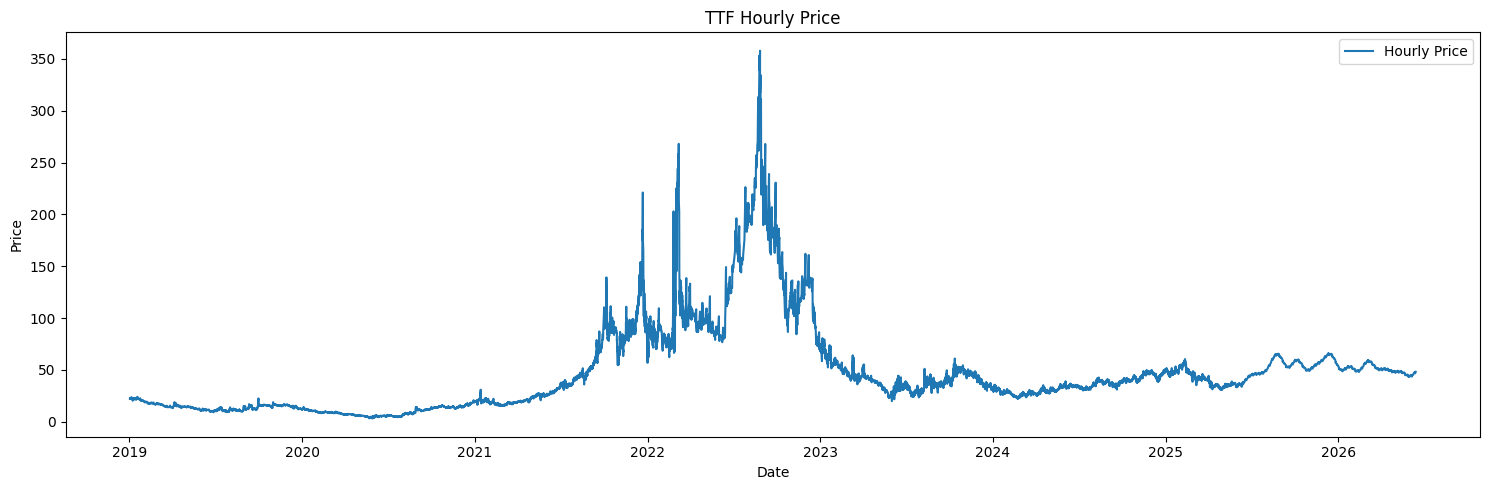

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df_hourly['Date'], df_hourly['Price'], label='Hourly Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TTF Hourly Price')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
df_hourly.to_csv('../Data/TTF_hourly_prediction.csv', index=False)